## Stage2 (Pattern Recognition) -  KMeans Clustering for IoT Pattern Similarity¶

### Stage 1 Linear (PCA) Dimension Reduction of the 8 IoTs benign data from 115 features to 10 principle components.

## Stage 2 Steps in Detail -
###      Input Data: 'Benign' from first 8 x IoTs: 536,404 records x 10 principle components
###      Stage 2 (Pattern Recognition): KMeans
###                 Step 2.1 --> Calculate Inertia to identify the correct number of clusters
###                 Step 2.2 --> Visual confirmation of IoT similarities among 20 clusters
###                 Step 2.3 --> Clustering of IoT patterns to group similar IoTs, as clusters of 3 or 4 or 5 groups.
###       Results: IoTs (1,3),(5,6) and (2,7,8) show pattern similarities among IoTs within those groups.

## Summary: Analysis show IoTs (1,3),(5,6) and (2,7,8) can be grouped together based on pattern recognition similarities.
#### backup Ref:  stage_2_pca_kmeans_ g_20200429_02.ipynb

### Stage 1 (Dimensionality Reduction): PCA
### Stage 1 - 536,404 records with 115 features ->  PCA (linear) dimension reduction -> 536,404 x 10 dimensions¶

In [1]:
# Import all packages required for compression and clustering
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import spatial
pd.set_option('display.max_rows', 500)


In [2]:
#Import benign files from all nine IoT devices and capture the device information in a seperate dataframe

device1 =pd.read_csv("1.benign.csv")
device1['Device'] = 1
label1 = device1['Device']
device1 = device1.drop(['Device'], axis=1)

device2 =pd.read_csv("2.benign.csv")
device2['Device'] = 2
label2 = device2['Device']
device2 = device2.drop(['Device'], axis=1)

device3 =pd.read_csv("3.benign.csv")
device3['Device'] = 3
label3 = device3['Device']
device3 = device3.drop(['Device'], axis=1)

device4 =pd.read_csv("4.benign.csv")
device4['Device'] = 4
label4 = device4['Device']
device4 = device4.drop(['Device'], axis=1)

device5 =pd.read_csv("5.benign.csv")
device5['Device'] = 5
label5 = device5['Device']
device5 = device5.drop(['Device'], axis=1)

device6 =pd.read_csv("6.benign.csv")
device6['Device'] = 6
label6 = device6['Device']
device6 = device6.drop(['Device'], axis=1)

device7 =pd.read_csv("7.benign.csv")
device7['Device'] = 7
label7 = device7['Device']
device7 = device7.drop(['Device'], axis=1)

device8 =pd.read_csv("8.benign.csv")
device8['Device'] = 8
label8 = device8['Device']
device8 = device8.drop(['Device'], axis=1)

# Device 9 is being withheld until stage 4 and introduced as a new IoT 
# into the IoT Ecosystem and pattern similarities used to match to similar IoT cluster.


In [3]:
# Combine all the benign data into a single dataframe
all_benign = device1.append([device2,device3,device4,device5,device6,device7,device8])

# Scale the benign data
scaler = StandardScaler()
scaler.fit(all_benign)
all_benign = scaler.transform(all_benign)

# Combine all the IoT device numbers into a dataframe
labels = label1.append([label2,label3,label4,label5,label6,label7,label8])

print("Input features shape -->", all_benign.shape)
print("Labels shape --> ", labels.shape)

# delete the individual device data dataframe to release memory
del device1, device2,device3,device4,device5,device6,device7,device8

Input features shape --> (536404, 115)
Labels shape -->  (536404,)


PCA variance explained -->  [36.60377136 18.94701123 13.43772733  9.14416253  5.9946775   4.41712791
  3.50810331  3.12110343  2.79440918  2.3682423 ]


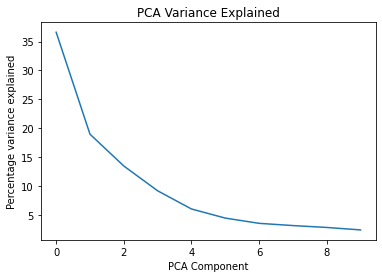

In [4]:
# Apply PCA on the inut features with 10 components
pca=PCA(n_components=10) 
pca.fit(all_benign) 
all_benign=pca.transform(all_benign)

# Variance explained
pca_variance_explained = pca.explained_variance_
print("PCA variance explained --> ", pca_variance_explained)
plt.plot(pca_variance_explained)
plt.title("PCA Variance Explained")
plt.xlabel("PCA Component")
plt.ylabel("Percentage variance explained")
plt.show()

## Stage 2 (Pattern Recognition): KMeans
## Apply pattern recognition techniques to find IoT similarities

In [5]:
# Fit a K-Means on 10 principle components from PCA. Try multiple values of n_clusters to find the optimal clusters

inertia = []
kmeans2 = KMeans(n_clusters=2, random_state=0, max_iter = 1000).fit(all_benign)
inertia.append(kmeans2.inertia_)

kmeans10 = KMeans(n_clusters=10, random_state=0, max_iter = 1000).fit(all_benign)
inertia.append(kmeans10.inertia_)

kmeans20 = KMeans(n_clusters=20, random_state=0, max_iter = 1000).fit(all_benign)
inertia.append(kmeans20.inertia_)

kmeans30 = KMeans(n_clusters=30, random_state=0, max_iter = 1000).fit(all_benign)
inertia.append(kmeans30.inertia_)

kmeans40 = KMeans(n_clusters=40, random_state=0, max_iter = 1000).fit(all_benign)
inertia.append(kmeans40.inertia_)

kmeans50 = KMeans(n_clusters=50, random_state=0, max_iter = 1000).fit(all_benign)
inertia.append(kmeans50.inertia_)


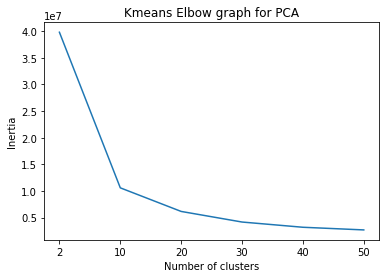

In [6]:
# Plot the kmeans elbow graph

components = ('2','10','20','30','40','50') 
plt.plot(components, inertia)
plt.title("Kmeans Elbow graph for PCA")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [7]:
# adding the device id and cluster labels for kmenas with the optimal number of clusters

all_benign = pd.DataFrame(all_benign)

# Add the device number back into the dataframe
all_benign['Device'] = labels.values

all_benign['Cluster20'] = kmeans20.labels_

# Adding a counter to sum the number of rows in a pivot table
all_benign['Counter'] = 1

all_benign.head()

,0,1,2,3,4,5,6,7,8,9,Device,Cluster20,Counter
0,-4.129508,0.807769,-1.123554,-1.213362,40.558242,-8.320779,-4.390020,-31.941843,-3.640965,-0.772878,1,5,1
1,4.334265,-8.491078,3.164592,-1.389085,-0.394659,-2.058676,0.806110,0.049179,0.088924,-0.272879,1,2,1
2,4.687647,-8.485490,3.322953,-1.348538,-0.397573,-2.129471,0.856496,0.056899,0.057731,-0.293760,1,2,1
3,3.773899,-8.131095,2.417157,-2.938067,40.306497,-9.709948,-4.490943,-31.929081,-3.181501,-0.989504,1,5,1
4,0.126369,-1.819396,-1.242148,-1.550790,40.746138,-6.628364,-4.904347,-31.937685,-4.089543,-2.586129,1,5,1


In [8]:
# Create a pivot table to idenitfy the number of data points for each Device and Cluster pair
kmeans20_pivot =all_benign.pivot_table(['Counter'] , ['Device', 'Cluster20'], aggfunc='sum').reset_index()

# Idenity the percentage of data points under each Device Cluster pair
kmeans20_pivot['Percentage'] = (kmeans20_pivot['Counter']/kmeans20_pivot.groupby("Device")["Counter"].transform('sum')*100)
print("Summary of data points under each device cluster pair")
print(kmeans20_pivot)



Summary of data points under each device cluster pair
    Device  Cluster20  Counter  Percentage
0        1          2       12    0.024219
1        1          5      128    0.258335
2        1         10       57    0.115040
3        1         16    49346   99.592315
4        1         18        5    0.010091
5        2          2     4896   37.336994
6        2          4        6    0.045756
7        2          5       24    0.183024
8        2          7        1    0.007626
9        2          9      100    0.762602
10       2         10       23    0.175398
11       2         11       10    0.076260
12       2         12      177    1.349806
13       2         16     4034   30.763365
14       2         17      954    7.275223
15       2         18     2888   22.023946
16       3          0      276    0.705882
17       3          2        4    0.010230
18       3          5      138    0.352941
19       3         10       75    0.191816
20       3         16    37473   95.838875


C:\Users\sures\Anaconda3\envs\Tensorflow\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


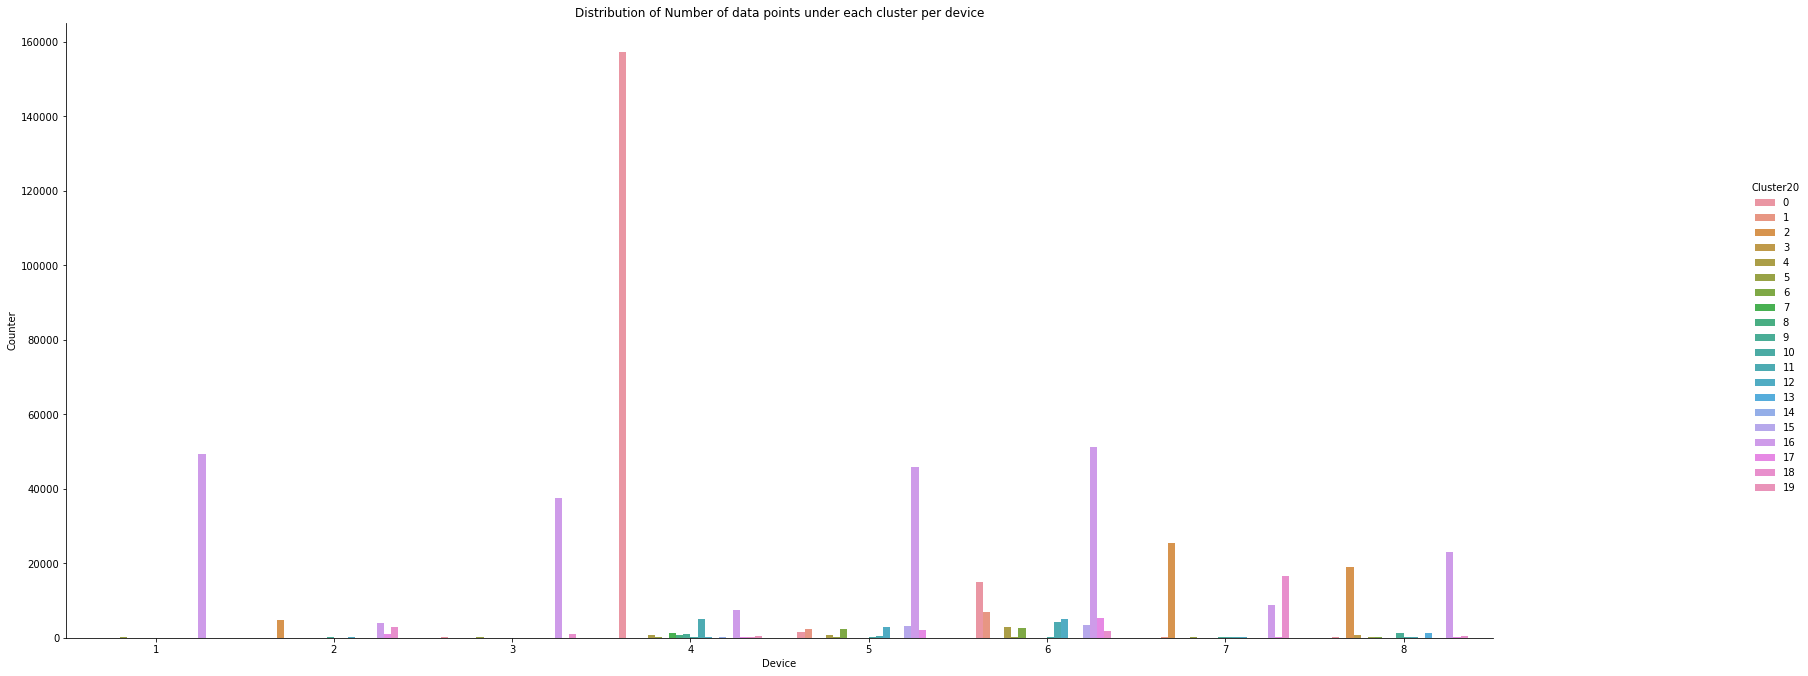

In [9]:
# Plot the distrbution of number of data points falling under each cluster for a device
g = sns.factorplot(x='Device', y='Counter', hue='Cluster20', data=kmeans20_pivot, kind='bar')
g.fig.set_size_inches(30,10)
plt.title("Distribution of Number of data points under each cluster per device")
plt.show()



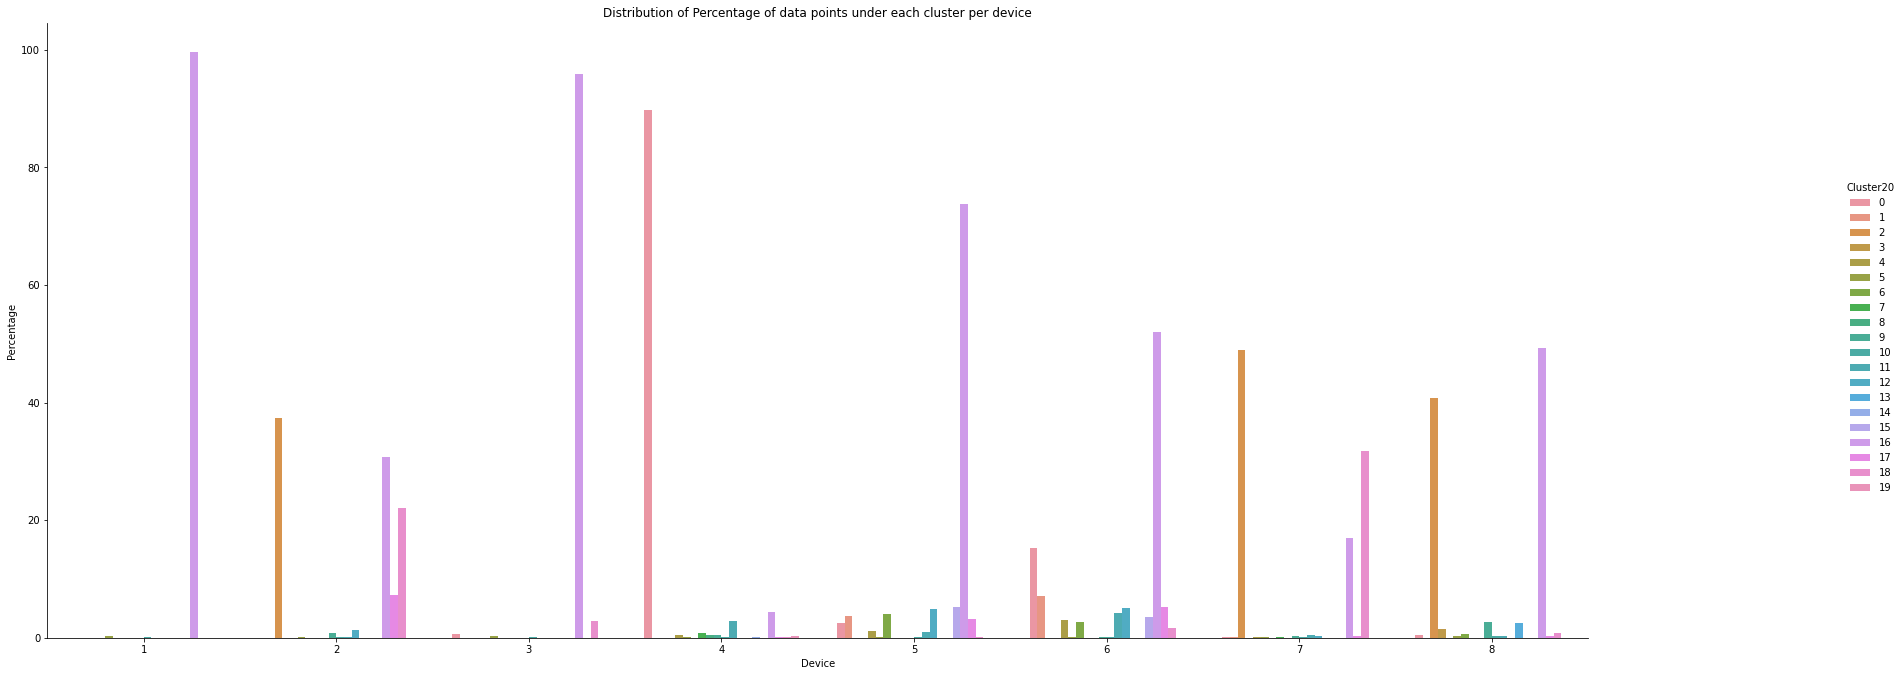

In [10]:
# Plot the distrbution of Percentage of data points falling under each cluster for a device
g = sns.factorplot(x='Device', y='Percentage', hue='Cluster20', data=kmeans20_pivot, kind='bar')
g.fig.set_size_inches(30,10)
plt.title("Distribution of Percentage of data points under each cluster per device")
plt.show()



In [11]:
# Create a dataframe for percentage distribution into clusters for each device. There are nine rows in the dataframe
# Each row corresponds to the cluster distribution for each device

numclusters = 20
clustergroup = pd.DataFrame(np.zeros((8, numclusters)))
for i in np.arange(1,9,1):
    for j in range(numclusters):
        row = kmeans20_pivot.loc[(kmeans20_pivot['Device'] == i) & (kmeans20_pivot['Cluster20'] == j)]
        if row.empty == False:
            clustergroup.iat[i-1,j] = row['Percentage']
            
print(clustergroup.head())

# Identify the device clusters based on similarity of distribution with the aim to group the devices into 3,4 and 5 clusters

kmeans5 = KMeans(n_clusters=5, random_state=0, max_iter = 1000).fit(clustergroup)
print("Devices clusters with 5 groups")
print(kmeans5.labels_)

kmeans4 = KMeans(n_clusters=4, random_state=0, max_iter = 1000).fit(clustergroup)
print("Devices clusters with 4 groups")
print(kmeans4.labels_)

kmeans3 = KMeans(n_clusters=3, random_state=0, max_iter = 1000).fit(clustergroup)
print("Devices clusters with 3 groups")
print(kmeans3.labels_)


# Code to find the cluser distances for five device clusters
centroids = kmeans5.cluster_centers_


# find the distance between the five cluster centroid
distance = spatial.distance.cdist(centroids,centroids)
distance = pd.DataFrame(distance)
print("Distance between clusters")
print(distance.head())

           0         1          2    3         4         5         6  \
0   0.000000  0.000000   0.024219  0.0  0.000000  0.258335  0.000000   
1   0.000000  0.000000  37.336994  0.0  0.045756  0.183024  0.000000   
2   0.705882  0.000000   0.010230  0.0  0.000000  0.352941  0.000000   
3  89.710112  0.000571   0.012554  0.0  0.501598  0.053641  0.000000   
4   2.434276  3.742317   0.020916  0.0  1.176111  0.181806  3.998134   

          7         8         9        10       11        12   13        14  \
0  0.000000  0.000000  0.000000  0.115040  0.00000  0.000000  0.0  0.000000   
1  0.007626  0.000000  0.762602  0.175398  0.07626  1.349806  0.0  0.000000   
2  0.000000  0.000000  0.000000  0.191816  0.00000  0.000000  0.0  0.000000   
3  0.761812  0.429126  0.528418  0.118124  2.84467  0.047934  0.0  0.106711   
4  0.006436  0.000000  0.048267  0.212376  0.98626  4.874988  0.0  0.000000   

        15         16        17         18        19  
0  0.00000  99.592315  0.000000   0.0